# Machine Learning: Lab 2
## Feature engineering
TA: Bryan Coulier (bryan.coulier@kuleuven.be)

features aanpassen aan de hand van wat je wil veranderen

In [459]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer, load_diabetes
from sklearn.feature_selection import SelectPercentile, f_classif, VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso


### Remove Constant Features
Remove all constant features from the random matrix with Scikit-learn and print the shape of the matrix

If Variance Threshold = 0 (Remove Constant Features )
If Variance Threshold > 0 (Remove Quasi-Constant Features )
http://medium.com/nerd-for-tech/removing-constant-variables-feature-selection-463e2d6a30d9

fit_transform(X) in VarianceThreshold berekent eerst de variantie van elke kolom (fit) en verwijdert vervolgens de kolommen met te lage variantie (transform). Hierdoor blijven alleen de relevante features over.


In [460]:
np.random.seed(1)
X_rand = np.random.randint(0, 100, (50, 10))
X_rand[:, [1,3,5]] = 100
X_rand[:5, :]
print("initiele data")
print(X_rand[:5, :])
X_reduced = VarianceThreshold(threshold=0).fit_transform(X_rand)
print("\nData na verwijderen van features met 0 variance")
print(X_reduced[:5, :])


initiele data
[[ 37 100  72 100  75 100  79  64  16   1]
 [ 76 100   6 100  50 100  18  84  11  28]
 [ 29 100  50 100  87 100  94  96  86  13]
 [  9 100  63 100  22 100   1   0  60  81]
 [  8 100  13 100  72 100  71   3  70  21]]

Data na verwijderen van features met 0 variance
[[37 72 75 79 64 16  1]
 [76  6 50 18 84 11 28]
 [29 50 87 94 96 86 13]
 [ 9 63 22  1  0 60 81]
 [ 8 13 72 71  3 70 21]]


uitpinten van de vorm van de originele dataset en van de nieuewe

In [461]:
print("Vorm van de originele dataset:", X_rand.shape)
print("Vorm van de nieuwe dataset:", X_reduced.shape)

Vorm van de originele dataset: (50, 10)
Vorm van de nieuwe dataset: (50, 7)


### Remove Quasi-Constant Features
Scale the features in the Housing.csv data and remove all features with a variance < 0.1, print the removed features

inladen van de dataset

In [462]:
housing_data = pd.read_csv('Housing.csv')

uitprinten van de vorm en de head van de initiele dataset 

In [ ]:
print("Vorm van de initiële dataset:", housing_data.shape)
print("Eerste paar rijen van de initiële dataset:")
print(housing_data.head())

Opschalen van de features 

de standaardscore wordt berekend aan de hand van :
'''
z = (x - u) / s
where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.'''

In [463]:
scaler = StandardScaler(with_std=False)
scaled_data = scaler.fit_transform(housing_data)

Vergelijking tussen de normale data en de geschaalde data 

In [464]:
print(housing_data.head())
print("-----------------")
print(pd.DataFrame(scaled_data, columns=housing_data.columns).head())

   index     crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0      1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1      2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2      3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3      4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4      5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   

   ptratio   black  lstat  medv  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
-----------------
   index      crim         zn     indus     chas       nox        rm  \
0 -252.5 -3.607204   6.636364 -8.826779 -0.06917 -0.016695  0.290366   
1 -251.5 -3.586214 -11.363636 -4.066779 -0.06917 -0.085695  0.136366   
2 -250.5 -3.586234 -11.363636 -4.066779 -0.06917 -0.085695  0.900366   
3 -249.5 -3.581154 -1

In [465]:
selector = VarianceThreshold(threshold=0.1)
reduced_data = selector.fit_transform(scaled_data)

# ~ staat voor not 
removed_features = housing_data.columns[~selector.get_support()]  

print("Removed features:", removed_features)

Removed features: Index(['chas', 'nox'], dtype='object')


### Univariate Feature Selection
Univariate feature selection is a simple technique for reducing the dimensionality of the feature space by selecting only the most important features.

Read in breast cancer toydataset and split into features and target

In [466]:
brcn = load_breast_cancer()

#opsplitsen in een target en in data 
target = brcn.target
features = brcn.data

print(target)
print (features)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

Select the 3 features with the strongest relationship to the target

In [467]:
df = pd.DataFrame(features, columns=brcn.feature_names)
df["target"] = brcn.target
correlations = df.corr()["target"].abs().sort_values(ascending=False)

# Selecteer de top 3 features
top_features = correlations.index[1:4]
print(top_features)

Index(['worst concave points', 'worst perimeter', 'mean concave points'], dtype='object')


Select features based on top 30 percentile

In [468]:
# selecteer de top 30% van de features
selector = SelectPercentile(score_func=f_classif, percentile=30)
selector.fit(features, target)

# krijg de geselecteerde features en hun scores
selected_features_percentile = brcn.feature_names[selector.get_support()]
feature_scores = selector.scores_[selector.get_support()]

Print out the names of the selected features that where selected based on the percentile

In [469]:
print("Geselecteerde features op basis van de top 30 percentiel:", selected_features_percentile)
print("Feature scores:", feature_scores)

Geselecteerde features op basis van de top 30 percentiel: ['mean radius' 'mean perimeter' 'mean area' 'mean concavity'
 'mean concave points' 'worst radius' 'worst perimeter' 'worst area'
 'worst concave points']
Feature scores: [646.98102098 697.23527248 573.06074657 533.7931262  861.67602001
 860.78170699 897.94421886 661.60020553 964.38539345]


Read in toydataset diabetes and split into features and target

inlezen dataset 

In [470]:
diabetes = load_diabetes()

Dataset splitsen in features en target

In [471]:
diabetes_features = diabetes.data
diabetes_target = diabetes.target

Uitprinten van de dataset

In [472]:
print(diabetes.feature_names)
print("-----------------")
print(diabetes_features)
print("-----------------")
print(diabetes_target)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
-----------------
[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]]
-----------------
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 14

Select features based on top 30 percentile and print out these features

# Laad de diabetes dataset

In [473]:
diabetes = load_diabetes()

# Splits de dataset in features en target

In [474]:

diabetes_features = diabetes.data
diabetes_target = diabetes.target


# Selecteer de top 30% van de features

In [475]:
selector = SelectPercentile(score_func=f_classif, percentile=30)
X_new30 = selector.fit(diabetes_features, diabetes_target)
selected_features = selector.get_support(indices=True)
features_scores = selector.scores_
selected_feature_names = [diabetes.feature_names[i] for i in selected_features]

# Print de geselecteerde features en hun scores

In [476]:
print("Geselecteerde features:", selected_feature_names)
print("Feature scores:", features_scores[selected_features])

Geselecteerde features: ['bmi', 's3', 's5']
Feature scores: [2.0316784  1.61974117 2.05387997]


## Problem 1: Fruits feature engineering
Given a dataset containing information about the size and color of fruits, the task is to create new (more useful) features from the existing ones.

### Dataset
The dataset is a pandas dataframe with two columns:

- "Size": a continuous variable representing the size of the fruit.
- "Color": a categorical variable representing the color of the fruit.

### Task
1) Create a new feature "Size_Category" by grouping the "Size" column into 3 categories: Small, Medium, and Large. The criteria for grouping the values should be as follows:
    - Small: Size < 100
    - Medium: 100 <= Size < 200
    - Large: Size >= 200
2) Create a new feature "Color_Encoded" by encoding the "Color" column using one-hot encoding.
3) Print the first 5 rows of the dataframe to check if the new features have been created successfully.

Example output:
|Index  | Size  | Color   | Size_Category | Color_Encoded_Red | Color_Encoded_Green | Color_Encoded_Yellow |
|-------|-------|---------|---------------|------------------|------------------- |-------------------- |
| 0     |150    | Green   | Medium           | 0.0              | 1.0                | 0.0                 |
| 1     |250    | Red     | Large           | 1.0              | 0.0                | 0.0                 |
| 2     |180    | Yellow  | Medium           | 0.0              | 0.0                | 1.0                 |
| 3     |100    | Green   | Medium           | 0.0              | 1.0                | 0.0                 |
| 4     |200    | Red     | Large           | 1.0              | 0.0                | 0.0                 |



Note: use the following code to generate a sample dataframe for the task:
```Python
import pandas as pd
import numpy as np

np.random.seed(0)
data = {"Size": np.random.randint(50, 300, size=(100,)),"Color": np.random.choice(["Red", "Green", "Yellow"], size=(100,))}
df = pd.DataFrame(data)
```

In [477]:
import pandas as pd
import numpy as np

np.random.seed(0)
data = {"Size": np.random.randint(50, 300, size=(100,)),"Color": np.random.choice(["Red", "Green", "Yellow"], size=(100,))}
df = pd.DataFrame(data)
df.head()

,Size,Color
0,222,Red
1,97,Yellow
2,167,Red
3,242,Red
4,117,Red


## Er zijn 3 categorieen: Small, Medium en Large , het opslaan van de data kan op 2 manieren: one hot encoding of binning

In [478]:
df2 = df 
df['Size_Category'] = pd.cut(df['Size'], bins=[-float('inf'), 100, 200, float('inf')], labels=['Small', 'Medium', 'Large'])

df2['Small'] = df2['Size'] < 100
df2['Medium'] = (df2['Size'] >= 100) & (df2['Size'] < 200)
df2['Large'] = df2['Size'] >= 200

uitprinten van de dataset

In [479]:
df.head()

,Size,Color,Size_Category,Small,Medium,Large
0,222,Red,Large,False,False,True
1,97,Yellow,Small,True,False,False
2,167,Red,Medium,False,True,False
3,242,Red,Large,False,False,True
4,117,Red,Medium,False,True,False


In [480]:
df2.head()

,Size,Color,Size_Category,Small,Medium,Large
0,222,Red,Large,False,False,True
1,97,Yellow,Small,True,False,False
2,167,Red,Medium,False,True,False
3,242,Red,Large,False,False,True
4,117,Red,Medium,False,True,False


De kleuren one hot encoden

In [481]:
color_dummies = pd.get_dummies(df['Color'], prefix='Color_Encoded')
df = pd.concat([df, color_dummies], axis=1)
df2 =pd.concat([df2, color_dummies], axis=1)

In [482]:
df.head()

,Size,Color,Size_Category,Small,Medium,Large,Color_Encoded_Green,Color_Encoded_Red,Color_Encoded_Yellow
0,222,Red,Large,False,False,True,False,True,False
1,97,Yellow,Small,True,False,False,False,False,True
2,167,Red,Medium,False,True,False,False,True,False
3,242,Red,Large,False,False,True,False,True,False
4,117,Red,Medium,False,True,False,False,True,False


In [483]:
df2.head()

,Size,Color,Size_Category,Small,Medium,Large,Color_Encoded_Green,Color_Encoded_Red,Color_Encoded_Yellow
0,222,Red,Large,False,False,True,False,True,False
1,97,Yellow,Small,True,False,False,False,False,True
2,167,Red,Medium,False,True,False,False,True,False
3,242,Red,Large,False,False,True,False,True,False
4,117,Red,Medium,False,True,False,False,True,False


## Problem 2: Housing dataset feature selection

Using the Household.csv dataset:
1. Select important features using 2 different feature selection methods of your choice
2. Explain how each feature selection method works
3. Train linear regression models on each feature subset and compare performance
4. Train a lasso regression model and compare with the other models
5. Analyse the impact of the alpha parameter on the performance of the lasso regression model. Explain the results. How is feature selection performed in lasso regularization?

biassed regressie om bepaalde dingen eruit laten , zodat de rechte beter ligt
normaal geizen afstand ten opzichte van de gefitte lijn hebben en je voegt een bias toe 
hoeveel elke feature 
alfa 0 : normale regressie 
alfa oneidig alle features eruit smijten 

Inlezen van de dataset 

In [484]:
data = pd.read_csv('Housing.csv')
data.head()

,index,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## opsplitsen van de data in een trainingset en in een testset en de targetKolom ervan halen

In [485]:
X = data.drop('medv', axis=1)  
y = data['medv']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print (X_train.shape, X_test.shape)

(354, 14) (152, 14)


## Schalen van de dataset

In [486]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# Pearson correlatie


Pearson correlatie meet de lineaire relatie tussen elke feature en de target. Features met een hoge absolute correlatie (positief of negatief) worden geselecteerd, omdat ze de sterkste invloed hebben op de output. Dit is een snelle en eenvoudige methode, maar werkt minder goed bij niet-lineaire relaties of als features onderling sterk gecorreleerd zijn.


In [487]:
correlations = X_train_scaled.corrwith(y_train).abs()
selected_pearson = correlations.nlargest(5).index.tolist()
print("Selected features using Pearson Correlation:", selected_pearson)

Selected features using Pearson Correlation: ['lstat', 'dis', 'indus', 'nox', 'chas']


## RFE
RFE selecteert features door een model (bijv. LinearRegression) te trainen en iteratief de minst belangrijke feature te verwijderen. Dit proces wordt herhaald totdat alleen de beste features overblijven. RFE is krachtig omdat het gebaseerd is op modelprestaties, maar kan traag zijn bij grote datasets en is afhankelijk van het gekozen model.

In [488]:
model = LinearRegression()
rfe = RFE(model, n_features_to_select=5)
fit = rfe.fit(X_train_scaled, y_train)
selected_features_rfe = X_train_scaled.columns[fit.support_]
print("Selected features using RFE:", selected_features_rfe)

Selected features using RFE: Index(['chas', 'nox', 'rm', 'dis', 'ptratio'], dtype='object')


# Trainen van het Pearson model 


In [489]:
model_pearson = LinearRegression()
model_pearson.fit(X_train_scaled[selected_pearson], y_train)
y_pred_pearson = model_pearson.predict(X_test_scaled[selected_pearson])
mse_pearson = mean_squared_error(y_test, y_pred_pearson)


# trainen van de RFE model

In [490]:
model_rfe = LinearRegression()
model_rfe.fit(X_train_scaled[selected_rfe], y_train)
y_pred_rfe = model_rfe.predict(X_test_scaled[selected_rfe])
mse_rfe = mean_squared_error(y_test, y_pred_rfe)

 # Trainen van Lasso Model

In [491]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)


In [492]:
print("Mean Squared Error (MSE) voor Pearson model:", mse_pearson)
print("Mean Squared Error (MSE) voor RFE model:", mse_rfe)
print("Mean Squared Error (MSE) voor Lasso model:", mse_lasso)

Mean Squared Error (MSE) voor Pearson model: 32.189124493995934
Mean Squared Error (MSE) voor RFE model: 28.207852604230407
Mean Squared Error (MSE) voor Lasso model: 23.391419991283268


Analyse van de Alfa waarde

Text(0.5, 1.0, 'Alpha vs. MSE')

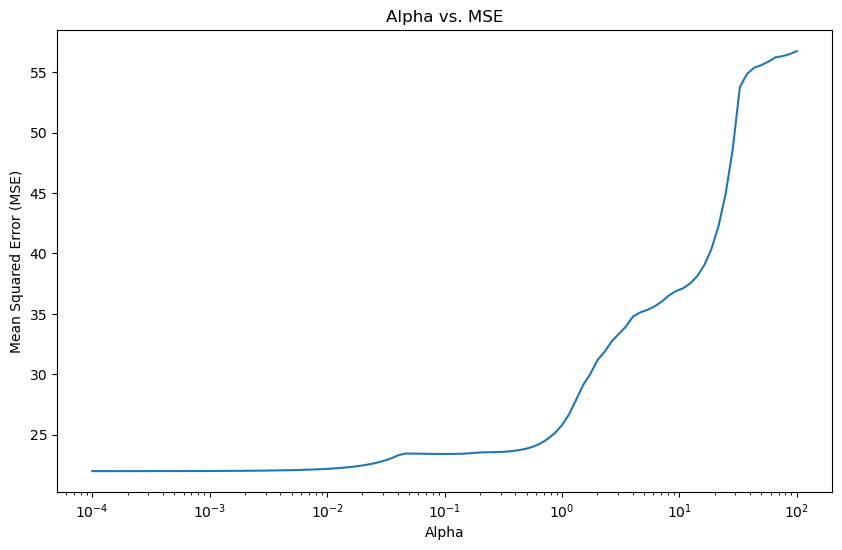

In [493]:
alphas = np.logspace(-4, 2, 100) # alphas from 0.0001 to 100
mse_values = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    mse_values.append(mean_squared_error(y_test, y_pred))

# Plotting
plt.figure(figsize=(10, 6))
plt.semilogx(alphas, mse_values)
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Alpha vs. MSE')


### Alfa waarde
Lasso-regressie gebruikt de alpha-parameter om de sterkte van regularisatie te bepalen. Een kleine alpha zorgt voor minder regularisatie, waardoor meer kenmerken behouden blijven, terwijl een grote alpha de coëfficiënten verder naar nul krimpt, wat leidt tot sterkere feature selectie. De grafiek toont de verandering in MSE bij verschillende alpha-waarden, waarbij de optimale alpha de MSE minimaliseert. Lasso voert automatische feature selectie uit door minder belangrijke kenmerken naar nul te krimpen, waarbij alleen de belangrijkste kenmerken overblijven.

### conclusie 

Pearson Correlatie is een snelle en eenvoudige methode die lineaire relaties tussen kenmerken en het doel meet, maar geen interacties tussen kenmerken overweegt. RFE (Recursive Feature Elimination) is computationeel intensiever en gebruikt een machine learning model om iteratief minder belangrijke kenmerken te verwijderen, waarbij het wel interacties tussen kenmerken in aanmerking neemt. Lasso is een krachtige techniek voor zowel feature selectie als regularisatie, waarbij de keuze van alpha cruciaal is: te klein kan leiden tot overfitting, te groot tot underfitting. Bij modelvergelijking kunnen de MSE’s van verschillende methoden, zoals Pearson en RFE, worden vergeleken om te bepalen welke feature selectie het beste presteert. Lasso biedt vaak een goede balans tussen prestaties en interpretatie, terwijl RFE beter presteert bij interacties tussen kenmerken en Pearson eenvoudiger is, maar mogelijk minder krachtig.